In [86]:
# Import libraries
import matplotlib.pyplot as plt # Matplotlib is used for plotting
import pandas as pd             # Pandas helps organize data structures
import numpy as np              # Numpy provides mathematical functions like sqrt()
import statsmodels.formula.api as smf  # Statsmodel provides logistic regression
import statsmodels.api as sm
import statistics 
import math
import seaborn as sns
import warnings
import copy

In [121]:
data = pd.read_csv('anesthesia.csv')
data.head()
#data = data.T
#print(data.shape)
#data


,Time,F0Hz_1,F1Hz_2,F3Hz_3,F4Hz_4,F5Hz_5,F6Hz_6,F8Hz_7,F9Hz_8,F10Hz_9,...,F115Hz_95,F116Hz_96,F117Hz_97,F119Hz_98,F120Hz_99,F121Hz_100,F122Hz_101,F124Hz_102,F125Hz_103,BehaviorResponse
0,5.004,3.115293,1.676500,1.097419,0.900837,0.537178,0.454494,0.512818,-0.131658,-0.121557,...,-3.219340,-3.164443,-3.336400,-3.259790,-3.270283,-3.219549,-3.275714,-3.298578,-3.314389,1.0
1,15.004,2.864158,1.499845,0.879378,1.020294,0.281333,0.722017,0.086080,0.080071,0.119713,...,-2.654771,-2.591587,-2.877959,-3.199018,-2.826822,-2.686335,-2.703506,-2.967259,-3.050596,1.0
2,25.004,2.039253,1.057344,0.163134,0.351954,0.149567,0.325558,0.231917,0.284673,-0.079226,...,-2.806694,-2.936570,-2.922557,-3.094296,-3.047691,-2.992025,-2.997460,-3.022261,-3.012685,1.0
3,35.004,2.417074,0.348083,0.582521,0.468952,0.176949,0.116783,0.200230,0.166558,0.185396,...,-3.646892,-3.907626,-3.773453,-3.645338,-3.830424,-4.055349,-4.010275,-3.829455,-3.847508,1.0
4,45.004,2.507836,1.036731,0.622822,0.436470,0.465713,0.703881,0.048926,-0.327707,0.073882,...,-2.835312,-2.807076,-2.909298,-3.070029,-2.993807,-2.875189,-2.894030,-3.065111,-3.130724,1.0


The predictor with the largest s.d is F11Hz_10


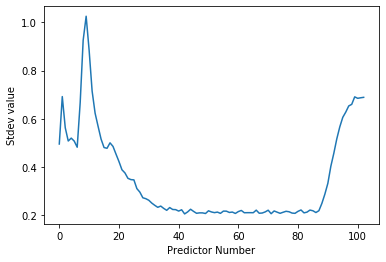

In [122]:
# Recall that the predictors are the power levels in each of a set of 103 frequency bands.
# Let Xi be the i’th predictor; since the predictor is actually a vector of values for each time point,
# we can write this as a matrix: Xij=the power of the i’th frequency band at the j’th time point.  
# Compute the standard deviation (s.d.) of each of the predictors and make a plot showing them. 
# Which frequency band has the largest s.d.?
count = 0
X = []
sds = []
nums = [x for x in range(103)]
for i in data.columns:
    if (i == 'Time' or i == 'BehaviorResponse'):
        continue
    sds.append(statistics.stdev(data[i]))
    X.append(i)

maxP = np.argmax(sds)
print('The predictor with the largest s.d is', X[maxP])
    
plt.plot(nums, sds)
plt.xlabel('Predictor Number')
plt.ylabel('Stdev value')
plt.show()

In [89]:
# The first step of our analysis will be to standardize the predictors by dividing each predictor 
# by its standard deviation. This ensures that all predictors have the same variance. 
# Using these values, define a new set of standardized predictors Aij=Xij/std(Xi). 
# Check that you have done this correctly by verifying that the s.d. of each of the standardized predictors is 1.

A = data[X]/sds
print(statistics.stdev(A[X[0]]))
A = A.T
print(A.shape)

0.9999999999999999
(103, 926)


In [123]:
# Perform singular value decomposition (SVD) on the data matrix, A.
# You can do this in python by using scipy.linalg.svd (Link updated: 10:23 am 11/18/2019). 
# SVD decomposes the data matrix, A, as a product of three matrices, A=USVT. 
# (Note that python returns the transpose of V, not V itself) What are the sizes (shapes) of the three matrices?
# How do these relate to the size of the original data matrix, A, which is p x n?

U, S, VT = np.linalg.svd(A)
print(U.shape, S.shape, VT.shape)

(103, 103) (103,) (926, 926)


U is the eigenvectors of AA' so its shape is a huge array of the size of nxn. VT is the eigenvectors of A'A which is more compact matrix and has the dims pxp. S is the eigenvalues for each eigenvector of VT.

In [91]:
# Let u1 be the first column of U. (In python, u1=U[:,0]). What is the L2 norm of u1,
# i.e. ||u1||2=u1Tu1 ? Note, in python you can take the transpose of a vector or matrix using u1.T, 
# and you can find the dot product of two vectors a,b using (a.T @ b).

u1 = U[:,0]
u1Norm = math.sqrt(u1.T @ u1)
print('L2 norm of u1 is:', u1Norm)

L2 norm of u1 is: 0.9999999999999999


In [92]:
# What is the dot product of the first two columns of  U, i.e.  u1Tu2? 
# This shows that U is an orthogonal matrix.

u2 = U[:,1]
dotprod = u1.T @ u2
print(dotprod)

-1.4983674023749671e-16


Extremely close to 0.

(926, 926)


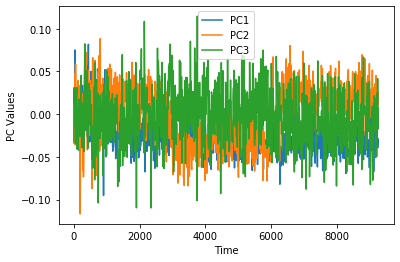

In [132]:
# Each of the columns of V corresponds to the time course of one of the principal components.
# Make a plot showing the value of PC1 as a function of time throughout the experiment. 
# Make similar plots showing the values of PC2 and PC3 vs. time.

# PC1
print(VT.shape)
plt.plot(data['Time'], VT[:, 0], label='PC1')
#plt.xlabel('Time')
#plt.ylabel('PC1 Values')
#plt.show()

# PC2
plt.plot(data['Time'], VT[:, 1], label='PC2')
#plt.xlabel('Time')
#plt.ylabel('PC2 Values')
#plt.show()

# PC3
plt.plot(data['Time'], VT[:, 2], label='PC3')
plt.xlabel('Time')
plt.ylabel('PC Values')
plt.legend()
plt.show()


The frequency that contributes the most positively to PC1 is: F106Hz_88
The frequency that contributes the most negatively to PC1 is: F0Hz_1
The frequency that contributes the most positively to PC2 is: F100Hz_83
The frequency that contributes the most negatively to PC2 is: F1Hz_2


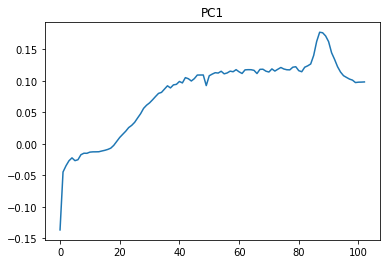

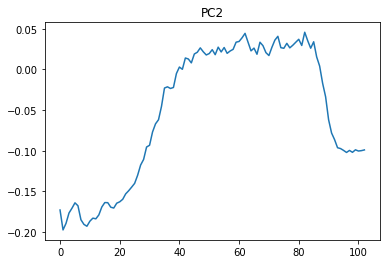

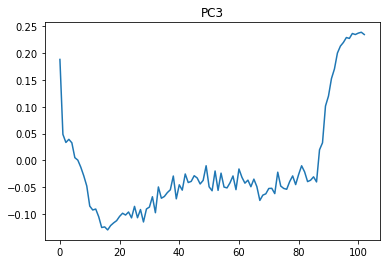

In [94]:
# Each of the columns of U is a coefficient indicating the contribution of one of the frequency bands to each PC. 
# Make a plot showing the first 3 columns of U. The x-axis will correspond to the 103 frequency bands. 
# Which frequencies contribute most strongly (either positive or negative weight) to PC1? What about PC2?
long_nums = [x for x in range(926)]
max1 = np.argmax(U[:, 0])
min1 = np.argmin(U[:, 0])
print('The frequency that contributes the most positively to PC1 is:', X[max1])
print('The frequency that contributes the most negatively to PC1 is:', X[min1])
max2 = np.argmax(U[:, 1])
min2 = np.argmin(U[:, 1])
print('The frequency that contributes the most positively to PC2 is:', X[max2])
print('The frequency that contributes the most negatively to PC2 is:', X[min2])

plt.plot(nums, U[:, 0])
plt.title('PC1')
plt.show()
plt.plot(nums, U[:, 1])
plt.title('PC2')
plt.show()
plt.plot(nums, U[:, 2])
plt.title('PC3')
plt.show()

In [104]:
new_data = copy.deepcopy(data)
new_data = new_data.drop(['Time', 'BehaviorResponse'], axis=1)
new_data = new_data.T
new_data

,0,1,2,3,4,5,6,7,8,9,...,916,917,918,919,920,921,922,923,924,925
F0Hz_1,3.115293,2.864158,2.039253,2.417074,2.507836,2.653466,2.818632,3.388791,3.040509,2.478499,...,2.878192,3.391444,2.965559,2.804295,2.878959,2.961581,3.290560,3.146313,3.338247,3.547944
F1Hz_2,1.676500,1.499845,1.057344,0.348083,1.036731,0.826140,0.812777,0.988516,0.675718,0.718670,...,0.960690,1.022730,0.826368,0.850330,0.502036,0.444593,0.931257,0.815451,1.166881,1.518529
F3Hz_3,1.097419,0.879378,0.163134,0.582521,0.622822,0.209316,0.639739,0.346861,0.876904,0.190132,...,0.634146,0.070524,0.713488,0.350149,0.194529,0.454837,0.692073,0.669192,0.692244,1.175584
F4Hz_4,0.900837,1.020294,0.351954,0.468952,0.436470,0.361964,-0.174088,0.051454,0.198643,-0.178255,...,0.425672,0.094584,-0.029374,-0.087123,0.237009,-0.071950,0.610929,0.265580,0.462821,0.676824
F5Hz_5,0.537178,0.281333,0.149567,0.176949,0.465713,0.082219,0.449189,0.144886,0.622403,0.475156,...,0.036717,0.285409,0.338979,0.208578,0.466667,0.273057,0.288181,-0.016286,0.717249,0.774509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F120Hz_99,-3.270283,-2.826822,-3.047691,-3.830424,-2.993807,-2.991800,-2.600463,-2.556236,-3.150692,-3.102552,...,-3.008752,-3.393214,-3.424151,-4.676101,-4.551787,-2.977684,-2.679423,-2.748098,-2.583025,-2.112144
F121Hz_100,-3.219549,-2.686335,-2.992025,-4.055349,-2.875189,-3.021345,-2.620864,-2.409790,-3.011477,-3.322608,...,-2.982865,-3.303046,-3.433239,-4.718217,-4.381276,-2.918039,-2.463434,-2.542581,-2.830088,-1.966203
F122Hz_101,-3.275714,-2.703506,-2.997460,-4.010275,-2.894030,-3.025712,-2.638424,-2.454562,-3.019597,-3.203206,...,-2.994206,-3.354659,-3.429544,-4.685373,-4.207697,-2.966945,-2.525790,-2.598921,-2.739890,-1.996231
F124Hz_102,-3.298578,-2.967259,-3.022261,-3.829455,-3.065111,-3.022836,-2.639613,-2.648130,-3.268977,-3.071163,...,-3.064044,-3.486247,-3.383567,-4.484401,-4.422456,-3.045963,-2.774898,-2.843970,-2.522532,-2.199435


In [134]:
# Run PC regression by fitting a linear model using the top k=1 principal component to predict the behavioral outcome.
# (Hint: You could use statsmodels.regression.linear_model.OLS). 
# Plot the model’s prediction for the behavior as a function of time. What is the MSE of this model fit?

#df_new = pd.DataFrame(VT, index=new_data.index, columns=['PC{}'.format(i+1) for i in np.arange(926)])
#df_new['BehaviorResponse'] = data['BehaviorResponse']
#print(df_new)
#model = sm.OLS(data['BehaviorResponse'], df_new['PC1']).fit()
#print(model.params)

# Time-series Stock data

In [86]:
# For time series, it is useful to split the data into training and test sets covering different time ranges. 
# Create a training dataset containing all the data points up to the start of 2018. 
# Create a test set containing the data since the start of 2018. Make a plot showing the weekly DJIA 
# (Close-the value at market closing) vs. time, using a different color or plot symbol for the training and testing data.

df = pd.read_csv('HW7_DJIA.csv')
df.head()

,Unnamed: 0,Year,Close
0,0,1985.000000,1277.719971
1,1,1985.019189,1289.969971
2,2,1985.038377,1282.020020
3,3,1985.057566,1275.839966
4,4,1985.076755,1299.359985


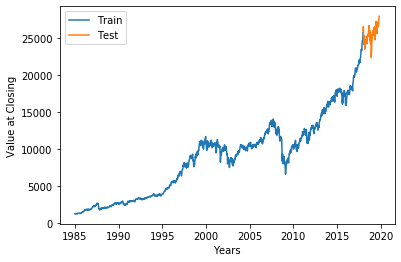

In [96]:
total_years = [i for i in range(1720)]
train = df.loc[df['Year'] < 2018]
test = df.loc[df['Year'] >= 2018]

plt.plot(train['Year'], train['Close'], label='Train')
plt.plot(test['Year'], test['Close'], label='Test')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Value at Closing')
plt.show()

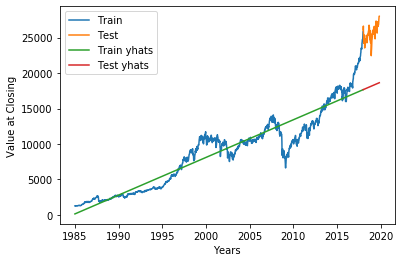

In [118]:
# Fit a linear model using the training data. (Hint: You could use numpy.polyfit, numpy.polyval) 
# Plot the resulting prediction, y, as a function of time and overlay it on top of the true data for both training and test.
# Is this model too simple or too complex for this dataset?

coefs = np.polyfit(train['Year'], train['Close'], 1)
yhat1 = np.polyval(coefs, train['Year'])
yhat2 = np.polyval(coefs, test['Year'])

plt.plot(train['Year'], train['Close'], label='Train')
plt.plot(test['Year'], test['Close'], label='Test')
plt.plot(train['Year'], yhat1, label='Train yhats')
plt.plot(test['Year'], yhat2, label='Test yhats')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Value at Closing')
plt.show()

This model is too simple for the data, it cannot follow the curves in the data any closer.

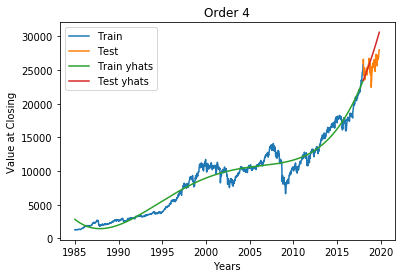

C:\Users\Jaime\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned


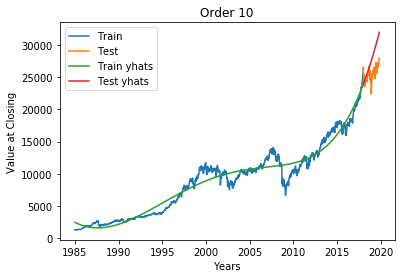

In [139]:
# Fit polynomials of order 1, 4 (quartic), 10. For each polynomial, plot y vs. time. 

###### Plot for order 1 is above  in part b) #########

# Polynomial order 4
coefs = np.polyfit(train['Year'], train['Close'], 4)
yhat1 = np.polyval(coefs, train['Year'])
yhat2 = np.polyval(coefs, test['Year'])

plt.plot(train['Year'], train['Close'], label='Train')
plt.plot(test['Year'], test['Close'], label='Test')
plt.plot(train['Year'], yhat1, label='Train yhats')
plt.plot(test['Year'], yhat2, label='Test yhats')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Value at Closing')
plt.title('Order 4')
plt.show()


# Polynomial order 10
coefs = np.polyfit(train['Year'], train['Close'], 10)
yhat1 = np.polyval(coefs, train['Year'])
yhat2 = np.polyval(coefs, test['Year'])

plt.plot(train['Year'], train['Close'], label='Train')
plt.plot(test['Year'], test['Close'], label='Test')
plt.plot(train['Year'], yhat1, label='Train yhats')
plt.plot(test['Year'], yhat2, label='Test yhats')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Value at Closing')
plt.title('Order 10')
plt.show()

4


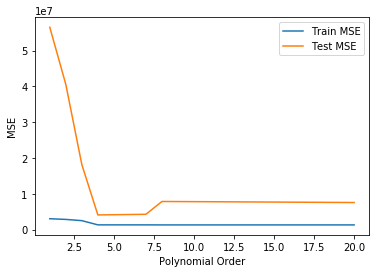

In [142]:
# Now write a loop to fit polynomials of all orders from 1 to 20.
# For each fit, calculate and store the MSE for training and testing data. 
# Finally, plot the training and testing MSE vs. the degree of the polynomial. 

train_mse = []
test_mse = []
for idx in range(1, 21):
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', np.RankWarning)
        coefs = np.polyfit(train['Year'], train['Close'], idx)
    yhat1 = np.polyval(coefs, train['Year'])
    yhat2 = np.polyval(coefs, test['Year'])
    #print('cl', train['Close'])
    #print('yhat1', yhat1)
    
    mse1 = ((train['Close'] - yhat1)**2).mean()
    mse2 = ((test['Close'] - yhat2)**2).mean()
    train_mse.append(mse1)
    test_mse.append(mse2)
    
nums = [i for i in range(1,21)]
lowest_mse = np.argmin(test_mse)
lowest_mse = nums[lowest_mse]
print(lowest_mse)
plt.plot(nums, train_mse, label='Train MSE')
plt.plot(nums, test_mse, label='Test MSE')
plt.legend()
plt.xlabel('Polynomial Order')
plt.ylabel('MSE')
plt.show()

##### If you are trying to make money by investing in the stock market, which of these polynomial models would you trust most to predict the future behavior of the stock market?

I would want the model with the lowest MSE on the testing data to be able to predict future data most accurately. In this case, the lowest MSE for the testing data is polynomial degree 4. This means that the data is best fitted when the order of the polynomial is 4. Looking at the MSE graph, the MSE doesn't change much from degrees 4 to about 7. All orders higher than that have higher MSE. 